In [84]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split


# Caio Henrique 10235481 - Lista 3 

# exerc 1

In [3]:
df = pd.read_csv("C:/Users/CaioMarques/Downloads/dataset-95529.csv")

In [4]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [5]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [129]:
##Questão B
# ajustar uam regressão logística (direction ~ lag1)
X = np.array(df["Lag1"]).reshape(-1,1)
Le = LabelEncoder()
y = Le.fit_transform(df["Direction"])
clf = LogisticRegression(random_state=0).fit(X, y)

In [133]:
log_reg = sm.Logit(y, X).fit()
y_pred = log_reg.predict(y)
y_pred = (y_pred > 0.5).astype(float)
print(log_reg.summary())
print(f"accuracy_score:{accuracy_score(y,y_pred)}")

Optimization terminated successfully.
         Current function value: 0.692242
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1088
Method:                           MLE   Df Model:                            0
Date:                Wed, 09 Jun 2021   Pseudo R-squ.:               -0.007686
Time:                        13:47:33   Log-Likelihood:                -753.85
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0362      0.026     -1.399      0.162      -0.087       0.015
accuracy_score:0.444444444444

In [75]:
#Questão C repetindo o modelo para (direction ~ lag1 + lag2)

In [76]:
# ajustar uam regressão logística (direction ~ lag1)
X = df[["Lag1","Lag2"]]
Le = LabelEncoder()
y = Le.fit_transform(df["Direction"])
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = 

In [ ]:
accuracy_score(y_test,y_pred)

In [77]:
log_reg = sm.Logit(y, X).fit()
y_pred = log_reg.predict(y)
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.689280
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Jun 2021   Pseudo R-squ.:               -0.003375
Time:                        13:05:28   Log-Likelihood:                -750.63
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0322      0.026     -1.235      0.217      -0.083       0.019
Lag2           0.0664      0.

In [173]:
#Questão D
Le = LabelEncoder()
df.Direction = Le.fit_transform(df.Direction)
df_train = df[df.Year <= 2008]
df_test = df[df.Year > 2008]

X_train = np.array(df_train[["Lag2"]])
X_test = np.array(df_test[["Lag2"]])
y_train = np.array(df_train[["Direction"]])
y_test = np.array(df_test[["Direction"]])

In [174]:
df_train.shape, df_test.shape

((985, 9), (104, 9))

In [175]:
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.690654
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                            0
Date:                Wed, 09 Jun 2021   Pseudo R-squ.:               -0.004340
Time:                        14:02:36   Log-Likelihood:                -680.29
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0629      0.029      2.192      0.028       0.007       0.119


In [176]:
df_train.shape, df_test.shape

((985, 9), (104, 9))

In [177]:
y_pred = log_reg.predict(X_test)
y_pred = (y_pred > 0.5).astype(float)
confusion_matrix(y_test,y_pred)


array([[20, 23],
       [24, 37]], dtype=int64)

In [178]:
accuracy_score(y_test,y_pred)

0.5480769230769231

In [186]:
#questão 3 , rodar com knn 

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)


<ipython-input-186-b953e92ef0cc>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


0.49038461538461536

In [184]:
y_pred = knn.predict(X_test)

In [187]:
confusion_matrix(y_test,y_pred)

array([[21, 22],
       [31, 30]], dtype=int64)

In [ ]:
# questão f
# o melhor modelo foi a regressão log (Direction ~ Lag2), melhor accuracy 

# Exerc 2 


In [2]:
df = pd.read_csv("C:/Users/CaioMarques/Downloads/dataset-38913.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [200]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [201]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [204]:
df["mpg1"] = (df.mpg > df.mpg.median()).astype(float)

<AxesSubplot:>

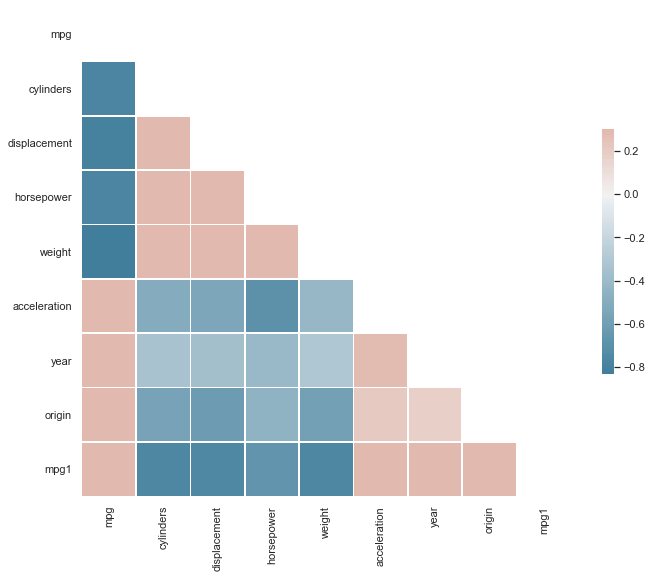

In [228]:

# gráfico com a relação das  variaveis 
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

rs = np.random.RandomState(33)
d = df

corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

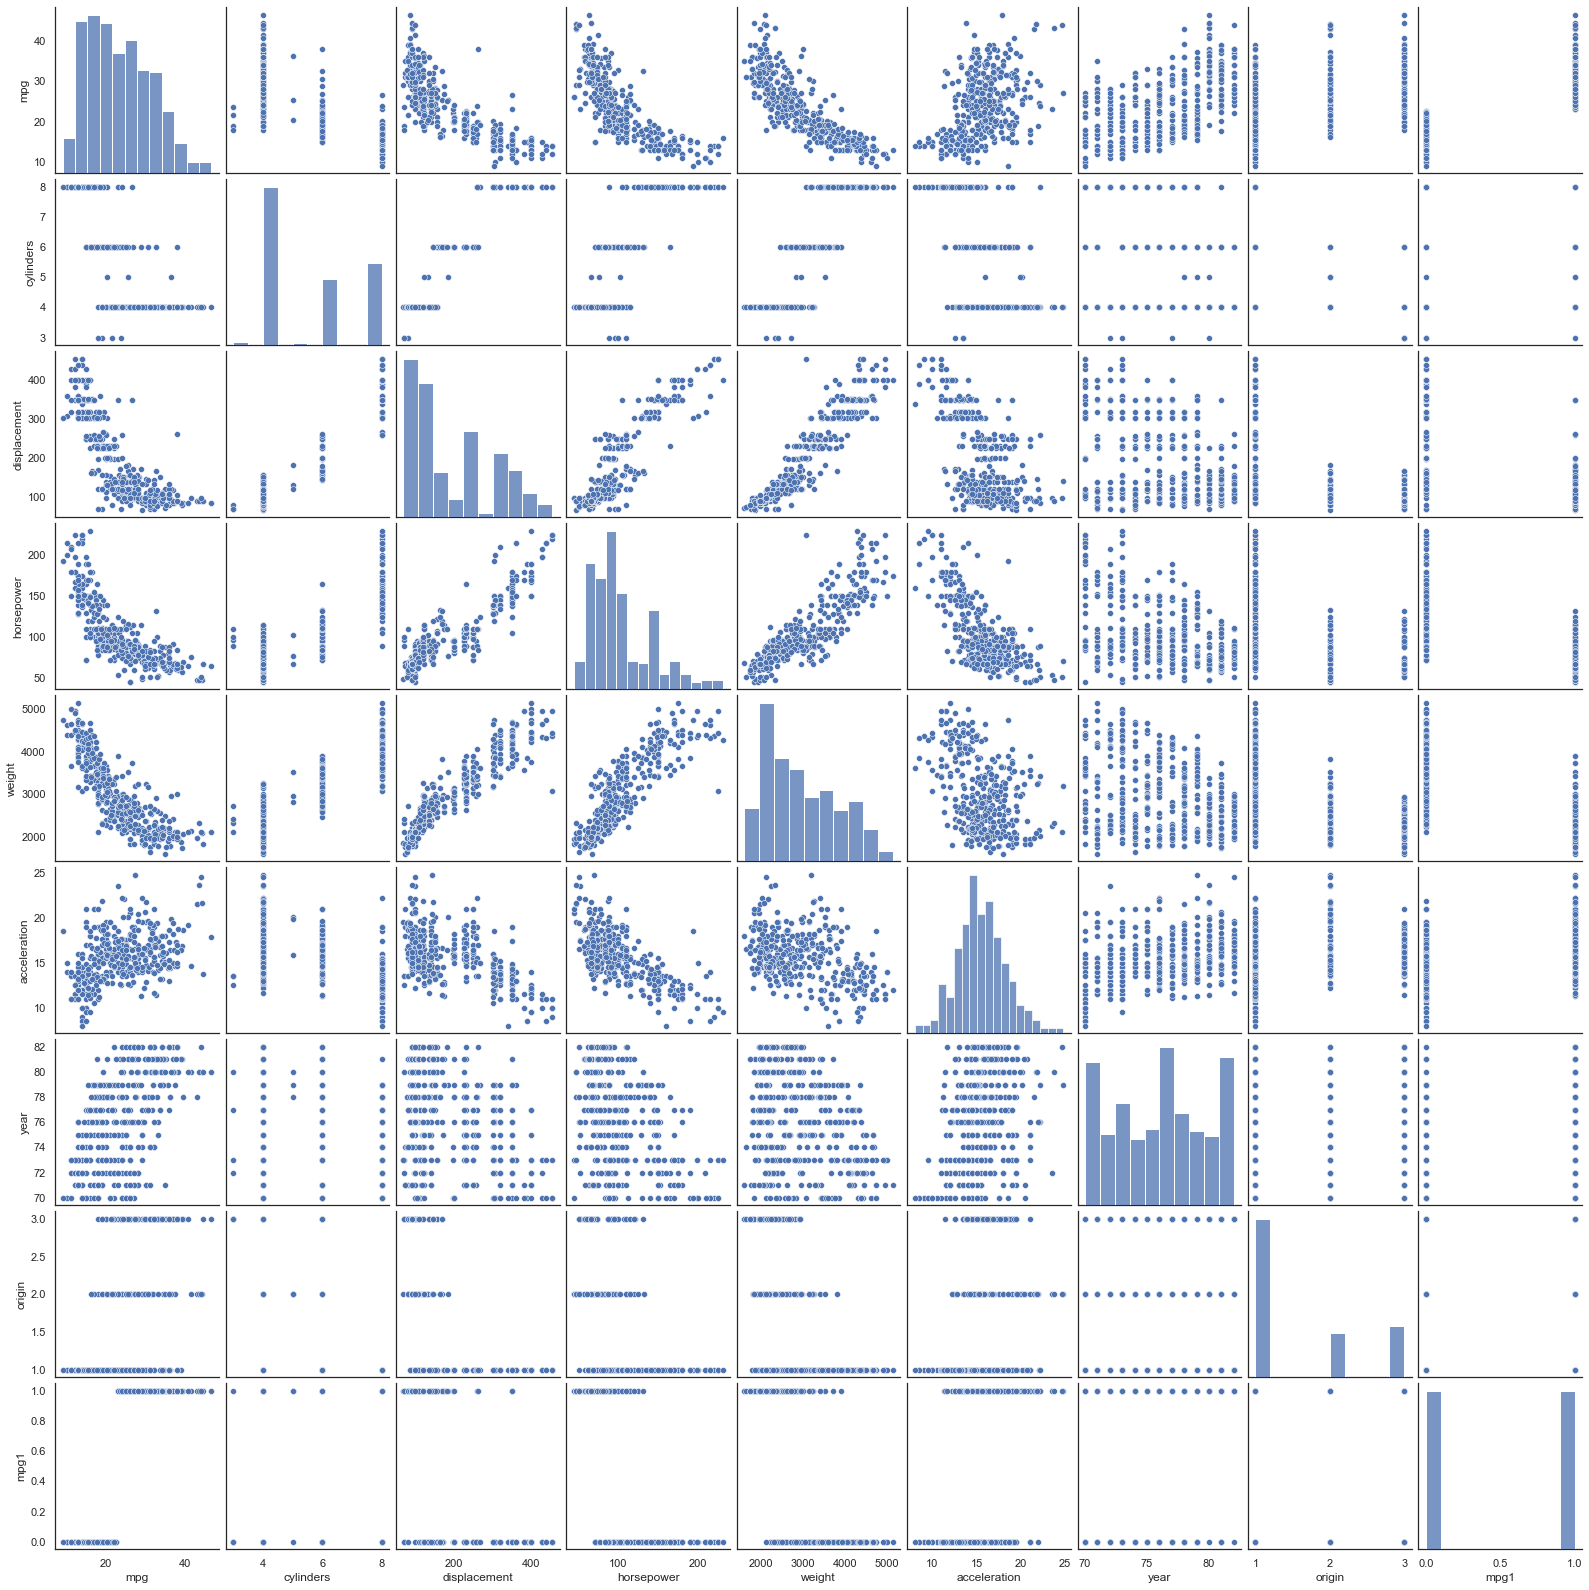

In [229]:
sns.pairplot(df)

In [213]:
df_train, df_test = train_test_split(df,test_size=0.25, random_state=42)

In [214]:
df_train.shape , df_test.shape

((294, 10), (98, 10))

In [224]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
y_train = df_train["mpg1"]
X_train = df_train[["cylinders","displacement","horsepower","weight"]]
y_test = df_test["mpg1"]
X_test = df_test[["cylinders","displacement","horsepower","weight"]]

clf = LinearDiscriminantAnalysis()

clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

In [225]:
accuracy_score(y_test,y_pred)

0.8877551020408163

In [242]:
# o melhor valor de n é 3
# usando um knn
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred =knn.predict(X_test)
    x = accuracy_score(y_test,y_pred)
    print(f"accuracy_score: {x} , n_neighbors: {i}")


accuracy_score: 0.8367346938775511 , n_neighbors: 1
accuracy_score: 0.8367346938775511 , n_neighbors: 2
accuracy_score: 0.9081632653061225 , n_neighbors: 3
accuracy_score: 0.8877551020408163 , n_neighbors: 4
accuracy_score: 0.8673469387755102 , n_neighbors: 5
accuracy_score: 0.8775510204081632 , n_neighbors: 6
accuracy_score: 0.8673469387755102 , n_neighbors: 7
accuracy_score: 0.8673469387755102 , n_neighbors: 8
accuracy_score: 0.8469387755102041 , n_neighbors: 9


In [243]:
# pelos valores da accuracy o melhoro modelo é o knn = 3 

# exerc 3

In [24]:
df = pd.read_clipboard() # colei do excel
df

,X1,X2,Y
0,3,4,blue
1,2,2,blue
2,4,4,blue
3,1,4,blue
4,2,1,red
5,4,3,red
6,4,1,red


C:\Users\CaioMarques\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


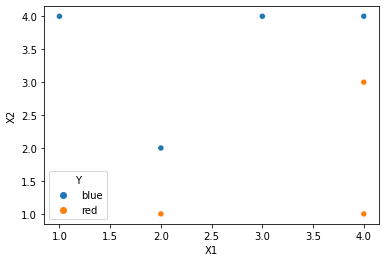

In [66]:
df.loc[6,"X1"] = 4
df.loc[6,"X2"] = 1
df
sns.scatterplot('X1', 'X2', data=df, hue='Y')

plt.show()

In [67]:
df

,X1,X2,Y
0,3,4,blue
1,2,2,blue
2,4,4,blue
3,1,4,blue
4,2,1,red
5,4,3,red
6,4,1,red


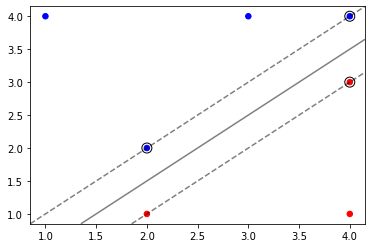

In [61]:
X = df[["X1","X2"]]
y = df["Y"]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(df.X1, df.X2, c=df.Y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [62]:
print('weights: ')
print(clf.coef_)
print('Intercept: ')
print(clf.intercept_)

weights: 
[[ 1.9998464 -1.9996928]]
Intercept: 
[-1.0004096]


In [63]:
df

,X1,X2,Y
0,3,4,blue
1,2,2,blue
2,4,4,blue
3,1,4,blue
4,2,1,red
5,4,3,red
6,4,1,red


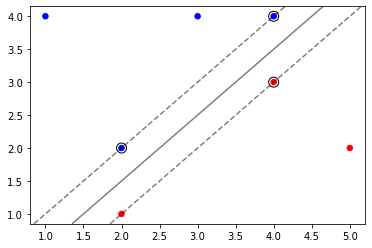

In [68]:
#alterando para verificar sensibilidade
df.loc[6,"X1"] = 5
df.loc[6,"X2"] = 2

X = df[["X1","X2"]]
y = df["Y"]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(df.X1, df.X2, c=df.Y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
#não houve alterações

# exerc 4

C:\Users\CaioMarques\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


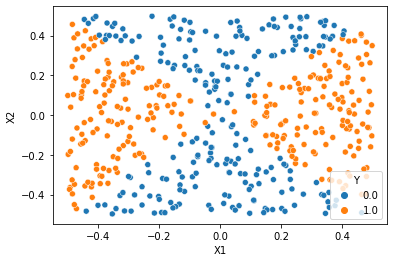

In [83]:
# criando o dataset
n = 500
x1 = np.random.uniform(size=n) - 0.5
x2 = np.random.uniform(size=n) - 0.5
y = (x1**2 - x2**2 > 0).astype(float)
df = pd.DataFrame({"X1":x1,"X2":x2,"Y":y})
X = df[["X1","X2"]]
y = df["Y"]

sns.scatterplot('X1', 'X2', data=df, hue='Y',legend='full')

plt.show()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [86]:
X_train.shape,X_test.shape

((375, 2), (125, 2))

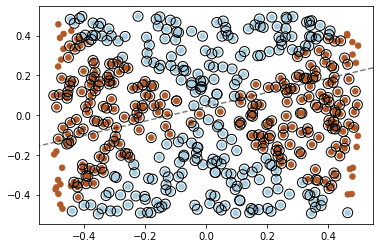

accuracy: 0.528


In [100]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(df.X1, df.X2, c=df.Y, s=30, cmap=plt.cm.Paired)

# plot the decision function
dict_option = {}
ax = plt.gca()
ax.figsize = (20,20)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()
print(f"accuracy: {clf.score(X_test,y_test)}")

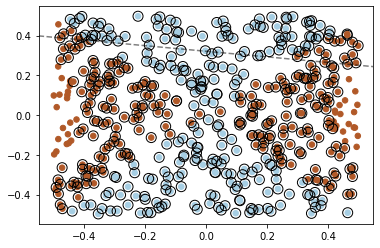

accuracy: 0.528


In [101]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=0.01)
clf.fit(X, y)

plt.scatter(df.X1, df.X2, c=df.Y, s=30, cmap=plt.cm.Paired)

# plot the decision function
dict_option = {}
ax = plt.gca()
ax.figsize = (20,20)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()
print(f"accuracy: {clf.score(X_test,y_test)}")

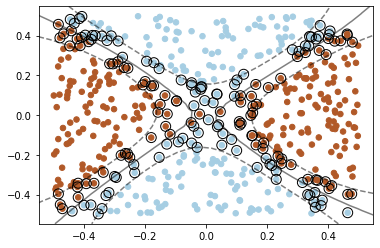

accuracy: 0.976


In [103]:
# usei o kernel rbf e C = 1
clf = svm.SVC(kernel='rbf', C=1)
clf.fit(X, y)

plt.scatter(df.X1, df.X2, c=df.Y, s=30, cmap=plt.cm.Paired)

# plot the decision function
dict_option = {}
ax = plt.gca()
ax.figsize = (20,20)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()
print(f"accuracy: {clf.score(X_test,y_test)}")

In [ ]:
# o kernel rbf conseguiu separar bem as variaveis,foi preciso ajustar o C para não haver overfit,
# como a separação é não linear, o kernel linear deu underfit